## Cumulative distribution function

The *cumulative distribution function (CDF)* of a random variable $y$ is a function $\Phi$ from $\mathbf{R}$ to $[0, 1]$. The number $\Phi(x)$ represents the probability that you will draw a number less than or equal to $x$, that is,
$$ \Phi(x) = \mathbf{P(y \le x)}.$$
For example, if $y$ is distrubuted uniformly on the interval $[5, 6]$, $\Phi$ is zero for $x < 5$, goes linearly from zero to one over the interval $[5, 6]$, and is one for $x > 6$.

The *empirical CDF* of a set $Y$ of $N$ random numbers is defined similarly: $\Phi(x)$ is the probability that a randomly selected element of $Y$ is less than or equal to $x$. That is, $\Phi(x)$ the number of elements of $Y$ less than or equal to $x$, divided by $N$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def make_data():
    m = np.random.uniform(-3, 3)
    return np.random.normal(m, 2, 10000)

### Question 1

Write a function that takes an array of numbers as input and returns their CDF. How will you represent the CDF -- is it also a function, an array, or what? Explain your choice.

In [56]:
Y = make_data()

### Answer 1.1

One way is to make a function that depends on $Y$ and $x$:

In [57]:
def cdf(Y, x):
    return np.sum(Y <= x) / len(Y)

In [58]:
xx = np.linspace(-10, 10, 50)
C = [cdf(Y, x) for x in xx]

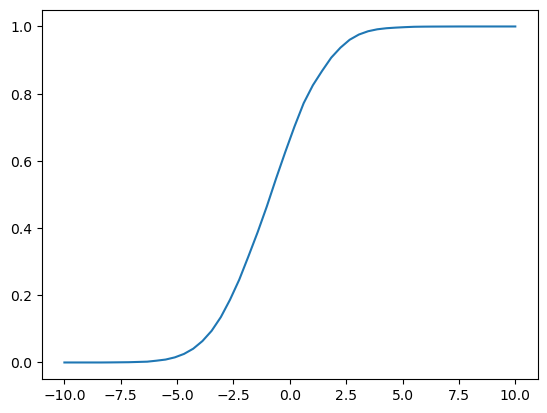

In [59]:
plt.plot(xx, C)

### Answer 1.2

Or, you can return an array, along with sample points:

In [60]:
def cdf(Y, k):
    # CDF of Y at k points
    xx = np.linspace(min(Y), max(Y), k, endpoint=True)
    sorted_Y = np.sort(Y)
    ii = np.searchsorted(sorted_Y, xx)
    return xx, ii/len(Y)

In [61]:
xx, C = cdf(Y, 50)

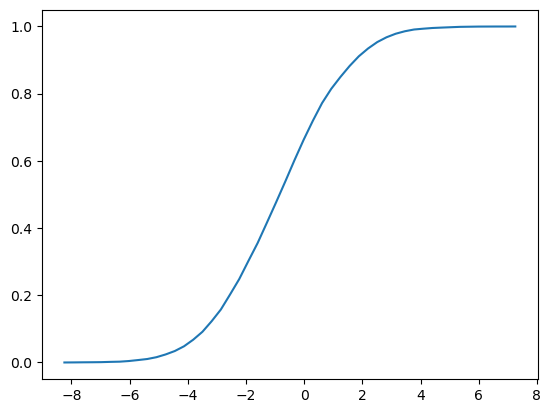

In [62]:
plt.plot(xx, C)

### Answer 1.3

One more way: use $Y$ as the sample points, allowing uneven sample points:

In [63]:
def cdf(Y):
    sorted_Y = np.sort(Y)
    return sorted_Y, np.linspace(0, 1, len(Y))

In [64]:
xx, C = cdf(Y)

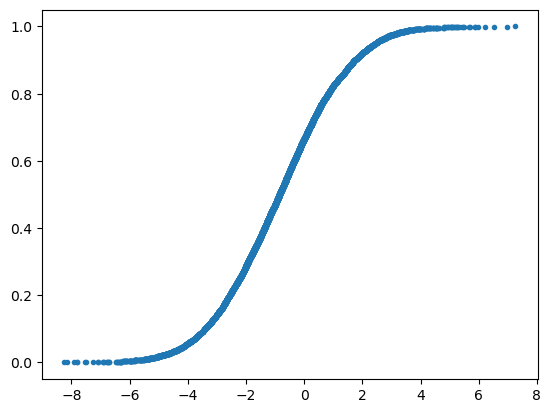

In [65]:
plt.plot(xx, C, ".")

### Question 2

How is the CDF related to the histogram?

### Answer 2

The CDF is the integral of the histogram, in the limit as the number of histogram bins gets arbitrarily large.